In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [74]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
TSL = yf.Ticker('TSLA')
TSL_mx = TSL.history(period = 'max')

In [7]:
TSL_mx.reset_index(inplace= True)

In [64]:
TSL_new = pd.DataFrame(TSL_mx, columns=['Date', 'Close'])


In [10]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [12]:
lm = requests.get(url).text
soup = BeautifulSoup(lm, 'lxml')

In [31]:
import numpy as np

tbl = soup.find_all('table', class_ ='historical_data_table')
date = []
revenue= []
ft = tbl[1]
rows = ft.find_all('tr')

for row in rows:
    cells = row.find_all('td')
    try:
        date.append(cells[0].text.strip())
        revenue.append(cells[1].text.strip())
    except:
        date.append(np.nan)
        revenue.append(np.nan)
   

d = {'Date':date, 'Revenue':revenue}
    
df = pd.DataFrame(d)    
df["Revenue"] = df['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.


In [34]:
df.dropna(inplace = True)
df.head(5)

,Date,Revenue
1,2022-09-30,21454
2,2022-06-30,16934
3,2022-03-31,18756
4,2021-12-31,17719
5,2021-09-30,13757


In [35]:
gme = yf.Ticker('GME')

In [36]:
gme_df = gme.history(period = 'max')

In [39]:
gme_df.reset_index(inplace = True)
pd.DataFrame(gme_df)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5440,2023-09-25,17.000000,17.719999,16.850000,17.670000,2181200,0.0,0.0
5441,2023-09-26,17.379999,17.820000,16.780001,16.780001,2726800,0.0,0.0
5442,2023-09-27,16.870001,17.260000,16.809999,17.150000,1681300,0.0,0.0
5443,2023-09-28,18.020000,18.100000,16.440001,16.840000,7431900,0.0,0.0


In [40]:
url_gme = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [41]:
gme_dt = requests.get(url_gme).text

In [45]:
gme_soup = BeautifulSoup(gme_dt, 'lxml')
#print(gme_soup)

In [54]:
tbl_gme = gme_soup.find_all('table', class_ = 'historical_data_table')
dt = []
rv = []

ft_gme = tbl_gme[1]

rows_gme = ft_gme.find_all('tr')
for ro in rows:
    cells_gme = ro.find_all('td')
    try:
        dt.append(cells_gme[0].text.strip())
        rv.append(cells_gme[1].text.strip())
    except:
        dt.append(np.nan)
        rv.append(np.nan)

e = {'Date':dt, 'Revenue':rv}
df_gme = pd.DataFrame(e)
df_gme.dropna(inplace= True)
df_gme["Revenue"] = df_gme['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [55]:
df_gme.head(5)

,Date,Revenue
1,2020-04-30,1021
2,2020-01-31,2194
3,2019-10-31,1439
4,2019-07-31,1286
5,2019-04-30,1548


In [102]:
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')


In [115]:
def make_graph(stock_data, revenue_data):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title='Gamestop',
    xaxis_rangeslider_visible=True)
    fig.show()

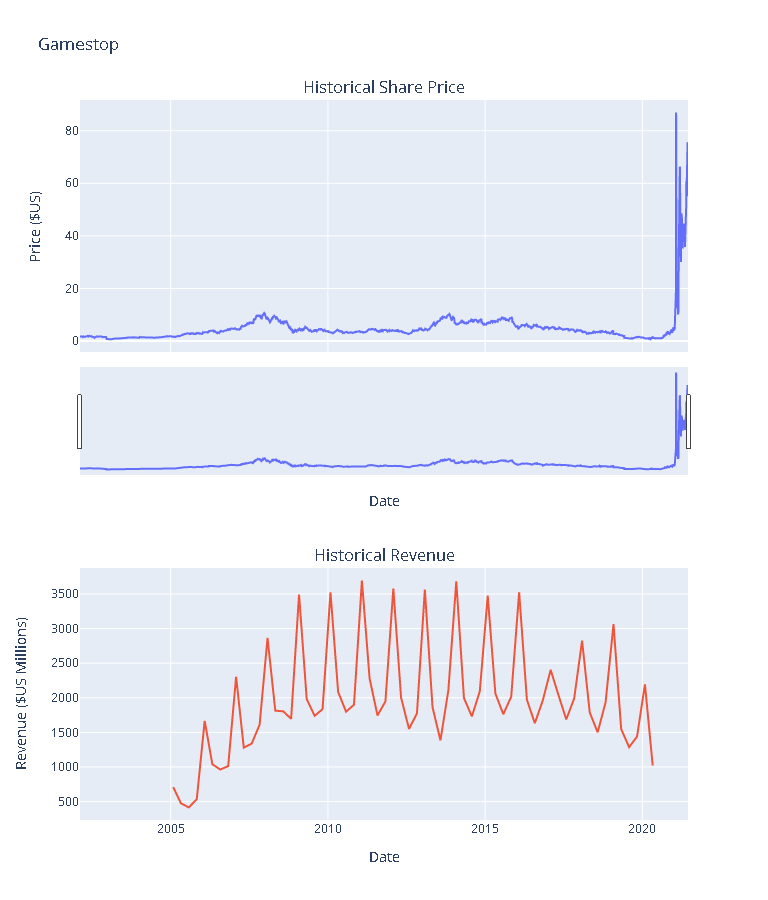

In [116]:
 make_graph(gme_df, df_gme)

dtype('float64')